# Finding Feature Importance (through Random Forest)

In [1]:
from ipynb.fs.full.concat_project2 import x_y_split

Using TensorFlow backend.


x train shape: (229, 143)
y train shape: (229, 15)
x test shape: (58, 143)
y test shape: (58, 15)
y_train for emotion 0: 15.0
y_train for emotion 1: 28.0
y_train for emotion 2: 17.0
y_train for emotion 3: 12.0
y_train for emotion 4: 10.0
y_train for emotion 5: 10.0
y_train for emotion 6: 14.0
y_train for emotion 7: 14.0
y_train for emotion 8: 11.0
y_train for emotion 9: 20.0
y_train for emotion 10: 15.0
y_train for emotion 11: 15.0
y_train for emotion 12: 15.0
y_train for emotion 13: 17.0
y_train for emotion 14: 16.0
y_test for emotion 0: 4.0
y_test for emotion 1: 4.0
y_test for emotion 2: 1.0
y_test for emotion 3: 4.0
y_test for emotion 4: 4.0
y_test for emotion 5: 5.0
y_test for emotion 6: 1.0
y_test for emotion 7: 3.0
y_test for emotion 8: 5.0
y_test for emotion 9: 4.0
y_test for emotion 10: 2.0
y_test for emotion 11: 2.0
y_test for emotion 12: 6.0
y_test for emotion 13: 6.0
y_test for emotion 14: 7.0


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

In [3]:
# Extracts training and test data set from concat_project
X_train, X_test, y_train, y_test = x_y_split('../../LDC2002S28.wav')

x train shape: (229, 143)
y train shape: (229, 15)
x test shape: (58, 143)
y test shape: (58, 15)
y_train for emotion 0: 16.0
y_train for emotion 1: 27.0
y_train for emotion 2: 14.0
y_train for emotion 3: 9.0
y_train for emotion 4: 12.0
y_train for emotion 5: 14.0
y_train for emotion 6: 10.0
y_train for emotion 7: 14.0
y_train for emotion 8: 15.0
y_train for emotion 9: 17.0
y_train for emotion 10: 15.0
y_train for emotion 11: 14.0
y_train for emotion 12: 18.0
y_train for emotion 13: 18.0
y_train for emotion 14: 16.0
y_test for emotion 0: 3.0
y_test for emotion 1: 5.0
y_test for emotion 2: 4.0
y_test for emotion 3: 7.0
y_test for emotion 4: 2.0
y_test for emotion 5: 1.0
y_test for emotion 6: 5.0
y_test for emotion 7: 3.0
y_test for emotion 8: 1.0
y_test for emotion 9: 7.0
y_test for emotion 10: 2.0
y_test for emotion 11: 3.0
y_test for emotion 12: 3.0
y_test for emotion 13: 5.0
y_test for emotion 14: 7.0


In [24]:
#Classifies all the feature labels
feat_labels = ['MFCC_1_Mean', 'MFCC_1_Median','MFCC_1_Var', 'MFCC_1_Min', 
               'MFCC_1_Max', 'MFCC_1_dMean','MFCC_1_dVar', 'MFCC_2_Mean',
               'MFCC_2_Median','MFCC_2_Var', 'MFCC_2_Min', 'MFCC_2_Max',
               'MFCC_2_dMean','MFCC_2_dVar', 'MFCC_3_Mean', 'MFCC_3_Median',
               'MFCC_3_Var', 'MFCC_3_Min', 'MFCC_3_Max', 'MFCC_3_dMean',
               'MFCC_3_dVar','MFCC_4_Mean', 'MFCC_4_Median',
               'MFCC_4_Var', 'MFCC_4_Min', 'MFCC_4_Max', 'MFCC_4_dMean',
               'MFCC_4_dVar','MFCC_5_Mean', 'MFCC_5_Median',
               'MFCC_5_Var', 'MFCC_5_Min', 'MFCC_5_Max', 'MFCC_5_dMean',
               'MFCC_5_dVar','MFCC_6_Mean', 'MFCC_6_Median',
               'MFCC_6_Var', 'MFCC_6_Min', 'MFCC_6_Max', 'MFCC_6_dMean',
               'MFCC_6_dVar','MFCC_7_Mean', 'MFCC_7_Median',
               'MFCC_7_Var', 'MFCC_7_Min', 'MFCC_7_Max', 'MFCC_7_dMean',
               'MFCC_7_dVar','MFCC_8_Mean', 'MFCC_8_Median',
               'MFCC_8_Var', 'MFCC_8_Min', 'MFCC_8_Max', 'MFCC_8_dMean',
               'MFCC_8_dVar','MFCC_9_Mean', 'MFCC_9_Median',
               'MFCC_9_Var', 'MFCC_9_Min', 'MFCC_9_Max', 'MFCC_9_dMean',
               'MFCC_9_dVar', 'MFCC_10_Mean', 'MFCC_10_Median',
               'MFCC_10_Var', 'MFCC_10_Min', 'MFCC_10_Max', 'MFCC_10_dMean',
               'MFCC_10_dVar', 'MFCC_11_Mean', 'MFCC_11_Median',
               'MFCC_11_Var', 'MFCC_11_Min', 'MFCC_11_Max', 'MFCC_11_dMean',
               'MFCC_11_dVar','MFCC_12_Mean', 'MFCC_12_Median',
               'MFCC_12_Var', 'MFCC_12_Min', 'MFCC_12_Max', 'MFCC_12_dMean',
               'MFCC_12_dVar', 'MFCC_13_Mean', 'MFCC_13_Median',
               'MFCC_13_Var', 'MFCC_13_Min', 'MFCC_13_Max', 'MFCC_13_dMean',
               'MFCC_13_dVar', 'Pitch_Mean', 'Pitch_Median', 'Pitch_Min', 'Pitch_Max',
               'Pitch_Var', 'Pitch_dMean', 'Pitch_dMin', 'Pitch_dMax', 'Spectral_Mean', 
               'Spectral_Median', 'Spectral_Min', 'Spectral_Max', 'Spectral_Var', 'Spectral_dMean', 
               'Spectral_dMin', 'Spectral_dMax','LPC_1', 'LPC_2','LPC_3', 'LPC_4', 'LPC_5', 
               'LPC_6', 'LPC_7', 'LPC_8', 'LPC_9', 'LPC_10', 'LPC_11', 'LPC_12', 'LPC_13',
               'RMS_Mean', 'RMS_Median', 'RMS_Min', 'RMS_Max','RMS_Var', 'RMS_dMean', 
               'RMS_dMin', 'RMS_dMax', 'Spec_Rolloff_Mean', 'Spec_Rolloff_Median',
               'Spec_Rolloff_Min', 'Spec_Rolloff_Max','Spec_Rolloff_Var', 'Spec_Rolloff_dMean', 
               'Spec_Rolloff_dMin', 'Spec_Rolloff_dMax', 'Zero_Cutoff_Mean', 'Zero_Cutoff_Median',
               'Zero_Cutoff_Min', 'Zero_Cutoff_Max','Zero_Cutoff_Var', 'Zero_Cutoff_dMean', 
               'Zero_Cutoff_dMin', 'Zero_Cutoff_dMax']

In [4]:
#Creates a Random Forest Classifier (Classifier chosen as opposed to regression)
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

#Trains the RF Classifier
clf.fit(X_train, y_train)

In [28]:
#Prints the name and the GINI importance of each feature 
sum1 = 0
featureList = []
for feature in zip(feat_labels, clf.feature_importances_):
    featureList.append(feature[1])
    print(feature)

('MFCC_1_Mean', 0.01583634711306886)
('MFCC_1_Median', 0.008931391465682009)
('MFCC_1_Var', 0.00916961821951693)
('MFCC_1_Min', 0.014195289624561382)
('MFCC_1_Max', 0.014965308670636068)
('MFCC_1_dMean', 0.007839730777965155)
('MFCC_1_dVar', 0.006400456623395336)
('MFCC_2_Mean', 0.012104304144238007)
('MFCC_2_Median', 0.01292159817993391)
('MFCC_2_Var', 0.003314520625280982)
('MFCC_2_Min', 0.003333293250393912)
('MFCC_2_Max', 0.004543994930289793)
('MFCC_2_dMean', 0.003461680222105055)
('MFCC_2_dVar', 0.004015934356137706)
('MFCC_3_Mean', 0.006390120611985339)
('MFCC_3_Median', 0.005357727927364488)
('MFCC_3_Var', 0.0062920376674865065)
('MFCC_3_Min', 0.003191908337965184)
('MFCC_3_Max', 0.0049460632200512365)
('MFCC_3_dMean', 0.0036643843795654035)
('MFCC_3_dVar', 0.00434127120082993)
('MFCC_4_Mean', 0.005865293938871139)
('MFCC_4_Median', 0.005433535043034648)
('MFCC_4_Var', 0.0061123692967785725)
('MFCC_4_Min', 0.005348381430584737)
('MFCC_4_Max', 0.0045710760561024685)
('MFCC_4_dMe

In [44]:
percentfeatureList = [i * 100 for i in featureList]

<BarContainer object of 143 artists>

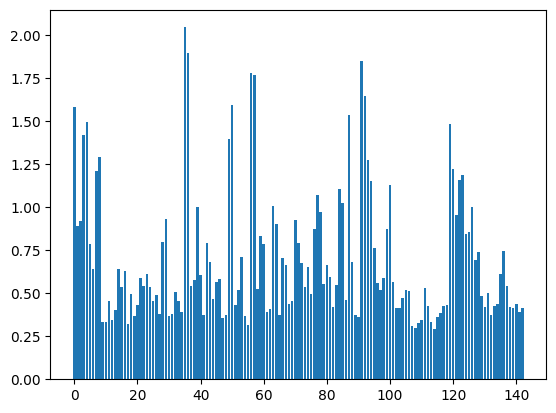

In [45]:
plt.bar(np.arange(len(percentfeatureList)),percentfeatureList)

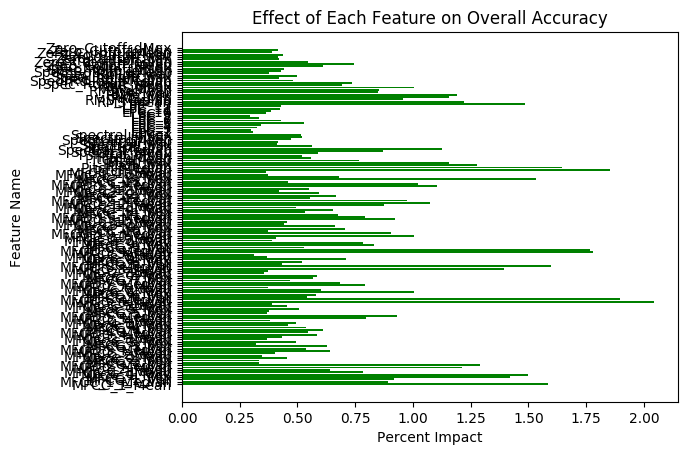

In [46]:
plt.rcdefaults()
fig, ax = plt.subplots()

x_pos = [i for i, _ in enumerate(feat_labels)]

plt.barh(np.arange(len(percentfeatureList)), percentfeatureList, color='green')
plt.ylabel("Feature Name")
plt.xlabel("Percent Impact")
plt.title("Effect of Each Feature on Overall Accuracy")

plt.yticks(x_pos, feat_labels)

plt.show()

In [9]:
sfm = SelectFromModel(clf, threshold=0.005)

In [10]:
sfm.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [11]:
featureListP = []
for feature_list_index in sfm.get_support(indices=True):
    print(feature_list_index)

0
1
2
3
4
5
6
7
8
14
15
16
21
22
23
24
28
29
32
35
36
37
38
39
40
42
43
45
46
49
50
52
53
56
57
58
59
60
63
64
66
67
70
71
72
73
74
76
77
78
79
80
81
83
84
85
87
88
91
92
93
94
95
96
97
98
99
100
101
105
106
111
119
120
121
122
123
124
125
126
127
128
135
136
137


In [20]:
X_important_train = sfm.transform(X_train)

In [13]:
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [16]:
clf_important.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.05172413793103448

In [18]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

NameError: name 'X_important_test' is not defined